# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=8c4b24c994bbef73d4649b1554a8c962ec3f97e9d5b63122d4a947ad228f4146
  Stored in directory: c:\users\navid\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Dependencies and Setupa
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [22]:
cities

['jamestown',
 'tateyama',
 'talnakh',
 'lebu',
 'koumra',
 'busselton',
 'ushuaia',
 'illoqqortoormiut',
 'manggar',
 'da nang',
 'torbay',
 'ponta do sol',
 'spring hill',
 'dzhusaly',
 'yellowknife',
 'russell',
 'hilo',
 'hobart',
 'agadir',
 'pa sang',
 'turayf',
 'saldanha',
 'clarence town',
 'barra do garcas',
 'kapaa',
 'tasiilaq',
 'hermanus',
 'atuona',
 'mys shmidta',
 'coihaique',
 'estelle',
 'ilulissat',
 'albany',
 'barentsburg',
 'acapulco',
 'mataura',
 'barrow',
 'makakilo city',
 'saint-philippe',
 'samusu',
 'aksha',
 'puerto quijarro',
 'upernavik',
 'chokurdakh',
 'orsha',
 'new norfolk',
 'kaeo',
 'touros',
 'partur',
 'bambanglipuro',
 'takoradi',
 'terney',
 'toyooka',
 'bluff',
 'guerrero negro',
 'booue',
 'constitucion',
 'zambezi',
 'egvekinot',
 'anuchino',
 'kiruna',
 'marshall',
 'burica',
 'kruisfontein',
 'kaitangata',
 'pochutla',
 'igrim',
 'leh',
 'dungarpur',
 'issia',
 'asau',
 'cidreira',
 'victoria',
 'kalevala',
 'piacabucu',
 'lompoc',
 'niko

In [8]:
weather_api_key

'0c9c02c5544c669fc6560aeae6f63994'

In [9]:
query_url = 'https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=0c9c02c5544c669fc6560aeae6f63994'

In [11]:
import requests
weatherdata = requests.get(query_url).json()
weatherdata

{'coord': {'lon': 139, 'lat': 35},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 278.88,
  'feels_like': 278.88,
  'temp_min': 278.88,
  'temp_max': 278.88,
  'pressure': 1016,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 0.45, 'deg': 100, 'gust': 0.45},
 'rain': {'1h': 1.21},
 'clouds': {'all': 100},
 'dt': 1648029699,
 'sys': {'type': 2,
  'id': 2019346,
  'country': 'JP',
  'sunrise': 1647981855,
  'sunset': 1648025828},
 'timezone': 32400,
 'id': 1851632,
 'name': 'Shuzenji',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
df = pd.DataFrame(cities)
df["Latitude"] = ""
df["Longitude"] = ""
df["Max Temp (F)"] = ""
df["Humidity"] = ""
df["Cloud Coverage"] = ""
df["Wind Speed"] = ""
df["Country"] = ""
df["Datetime"] = ""

# rename the column name '0' as 'City'
df.rename(columns={0 : 'City'}, inplace=True)
df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,jamestown,,,,,,,,
1,tateyama,,,,,,,,
2,talnakh,,,,,,,,
3,lebu,,,,,,,,
4,koumra,,,,,,,,
...,...,...,...,...,...,...,...,...,...
584,piopio,,,,,,,,
585,bodden town,,,,,,,,
586,saint-francois,,,,,,,,
587,kaitong,,,,,,,,


In [25]:
# use the following site to pull the calls https://openweathermap.org/current
# api call url - api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
# create a shell df with columns for City Lat Lng Max Temp Humidity Cloudiness Wind Speed Country Date
# option1 - create shell lists for each of the columns then combine then below into a df
# option2 - figure out how to populate dataframe with the for loop method using .iterrows() 
city_num = 1

print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# Using option 2 - I wanted to test using .iterrows() to populate the data frame skeleton I created above
for index, row in df.iterrows():
    base_url = f"https://api.openweathermap.org/data/2.5/weather?q={row['City']}&appid={weather_api_key}&units=imperial"
    query_data = requests.get(base_url).json()
    
    try:
        print(f"Processing record {city_num} out of {len(cities)} | {row['City']} | {query_data['main']['temp']}")
        
        df.loc[index, 'Latitude'] = query_data['coord']['lat']
        df.loc[index, 'Longitude'] = query_data['coord']['lon']
        df.loc[index, 'Max Temp (F)'] = query_data['main']['temp_max']
        df.loc[index, 'Humidity'] = query_data['main']['humidity']
        df.loc[index, 'Cloud Coverage'] = query_data['clouds']['all']
        df.loc[index, 'Wind Speed'] = query_data['wind']['speed']
        df.loc[index, 'Country'] = query_data['sys']['country']
        df.loc[index, 'Datetime'] = query_data['dt']
        
        city_num += 1     
    except:
        print("City not found.")
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 out of 589 | jamestown | 40.05
Processing record 2 out of 589 | tateyama | 58.08
Processing record 3 out of 589 | talnakh | 15.21
Processing record 4 out of 589 | lebu | 54.79
Processing record 5 out of 589 | koumra | 82.35
Processing record 6 out of 589 | busselton | 84.96
Processing record 7 out of 589 | ushuaia | 51.46
City not found.
Processing record 8 out of 589 | manggar | 86.59
Processing record 9 out of 589 | da nang | 89.58
Processing record 10 out of 589 | torbay | 25.52
Processing record 11 out of 589 | ponta do sol | 60.85
Processing record 12 out of 589 | spring hill | 60.33
City not found.
Processing record 13 out of 589 | yellowknife | -10.68
Processing record 14 out of 589 | russell | 51.03
Processing record 15 out of 589 | hilo | 72.25
Processing record 16 out of 589 | hobart | 72.28
Processing record 17 out of 589 | agadir | 54.05
Processing record 18 out of 589 

Processing record 155 out of 589 | irbil | 51.62
Processing record 156 out of 589 | santa marta | 84.25
Processing record 157 out of 589 | forio | 50.29
Processing record 158 out of 589 | chimbote | 68.86
City not found.
Processing record 159 out of 589 | esperance | 82.24
Processing record 160 out of 589 | yatou | 48.24
Processing record 161 out of 589 | dikson | 11.86
Processing record 162 out of 589 | hasaki | 61.2
Processing record 163 out of 589 | longyearbyen | -2.36
Processing record 164 out of 589 | ahuimanu | 74.84
Processing record 165 out of 589 | khovu-aksy | 21.18
Processing record 166 out of 589 | buala | 83.05
City not found.
Processing record 167 out of 589 | huadian | 51.53
Processing record 168 out of 589 | panama city | 75.83
City not found.
Processing record 169 out of 589 | amga | 29.32
Processing record 170 out of 589 | khandagayty | 20.34
Processing record 171 out of 589 | alofi | 78.69
Processing record 172 out of 589 | mokhsogollokh | 30.33
Processing record 17

Processing record 310 out of 589 | amazar | 32.56
Processing record 311 out of 589 | meulaboh | 85.62
Processing record 312 out of 589 | palimbang | 85.48
City not found.
Processing record 313 out of 589 | matamoros | 52.66
Processing record 314 out of 589 | hakodate | 45.09
City not found.
Processing record 315 out of 589 | taoudenni | 67.64
Processing record 316 out of 589 | ancud | 51.22
Processing record 317 out of 589 | klaksvik | 45.52
Processing record 318 out of 589 | zaysan | 29.62
Processing record 319 out of 589 | corsicana | 44.98
Processing record 320 out of 589 | ha giang | 81
Processing record 321 out of 589 | kirovohrad | 41.36
Processing record 322 out of 589 | kloulklubed | 73.9
City not found.
Processing record 323 out of 589 | sampit | 86.9
City not found.
Processing record 324 out of 589 | gonen | 46.53
Processing record 325 out of 589 | adrar | 59.36
Processing record 326 out of 589 | faya | 66.24
Processing record 327 out of 589 | palu | 87.15
Processing record 3

Processing record 465 out of 589 | lorengau | 84.18
Processing record 466 out of 589 | bilibino | 18.99
Processing record 467 out of 589 | inirida | 75.69
Processing record 468 out of 589 | bintulu | 86.07
Processing record 469 out of 589 | donskoye | 34.83
City not found.
Processing record 470 out of 589 | beringovskiy | 17.17
Processing record 471 out of 589 | zerbst | 41.86
Processing record 472 out of 589 | borogontsy | 24.82
Processing record 473 out of 589 | la cruz | 65.73
Processing record 474 out of 589 | ayagoz | 25.9
Processing record 475 out of 589 | casa nova | 75.61
Processing record 476 out of 589 | boda | 75.34
Processing record 477 out of 589 | nalut | 49.48
Processing record 478 out of 589 | koran | 24.31
Processing record 479 out of 589 | penzance | 43.48
Processing record 480 out of 589 | surt | 52
Processing record 481 out of 589 | morondava | 81.59
Processing record 482 out of 589 | andrews | 53.46
Processing record 483 out of 589 | teguise | 59.22
Processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Need to clean the data of the empty cells, it messes up calculations later on if you don't because you can't use a bool on a string (the empty cells)
df['Humidity'] = df['Humidity'].replace('', np.nan)
city_df = df.dropna()
city_df.shape

(550, 9)

In [27]:
# Display the cities weather dataframe pulled from the live API data
city_df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,jamestown,42.097,-79.2353,40.64,63.0,0,8.05,US,1648187257
1,tateyama,34.9833,139.8667,58.08,55.0,25,10.2,JP,1648187258
2,talnakh,69.4865,88.3972,15.21,91.0,100,12.41,RU,1648187260
3,lebu,-37.6167,-73.65,54.79,80.0,1,20.98,CL,1648187261
4,koumra,8.9126,17.5539,82.35,42.0,75,2.26,TD,1648187262
...,...,...,...,...,...,...,...,...,...
584,piopio,-38.4667,175.0167,58.66,81.0,99,8.12,NZ,1648188412
585,bodden town,19.2833,-81.25,80.01,74.0,36,7,KY,1648188413
586,saint-francois,46.4154,3.9054,31.44,93.0,1,2.3,FR,1648188414
587,kaitong,44.8135,123.15,50.11,29.0,69,14.99,CN,1648188415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
# Created a new dataframe variable called clean_city_df pulling the Humidity over 100 with a boolean
# Used .reset_index() to reset the index numbers and used parameter drop=true so no new column is made
clean_city_df = city_df[(city_df["Humidity"] <= 100)]
clean_city_df = clean_city_df.reset_index(drop=True)
clean_city_df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,jamestown,42.097,-79.2353,40.64,63.0,0,8.05,US,1648187257
1,tateyama,34.9833,139.8667,58.08,55.0,25,10.2,JP,1648187258
2,talnakh,69.4865,88.3972,15.21,91.0,100,12.41,RU,1648187260
3,lebu,-37.6167,-73.65,54.79,80.0,1,20.98,CL,1648187261
4,koumra,8.9126,17.5539,82.35,42.0,75,2.26,TD,1648187262
...,...,...,...,...,...,...,...,...,...
545,piopio,-38.4667,175.0167,58.66,81.0,99,8.12,NZ,1648188412
546,bodden town,19.2833,-81.25,80.01,74.0,36,7,KY,1648188413
547,saint-francois,46.4154,3.9054,31.44,93.0,1,2.3,FR,1648188414
548,kaitong,44.8135,123.15,50.11,29.0,69,14.99,CN,1648188415


In [52]:
#  Get the indices of cities that have humidity over 100%.
# Export the City_Data into a csv
# exported data to current folder using .to_csv() with parameter index=False so that index isn't written into csv (default is True)
clean_city_df.to_csv('weather_raw_data.csv', index=False)
clean_city_df.to_csv('../VacationPy/weather_raw_data.csv', index=False)

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This code plots the 'Max Temp (F)' vs the 'Latitude' columns from the dataframe. It shows that as we go further from the equator (away from 0 +/-)


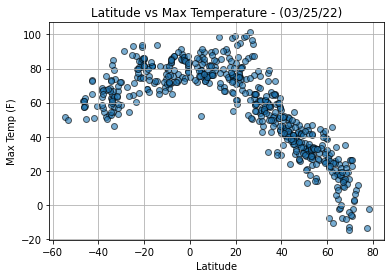

In [33]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Max Temp' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Max Temp (F)'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Max Temperature - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("Fig1_Lat_v_Temp.png")

print(f"This code plots the 'Max Temp (F)' vs the 'Latitude' columns from the dataframe. It shows that as we go further from the equator (away from 0 +/-)")

## Latitude vs. Humidity Plot

This code plots the 'Humidity (%)' vs the 'Latitude' columns from the dataframe. It shows that as we approach the latitudes of 40 and -40 there's a higher likelihood that humidity will drop.


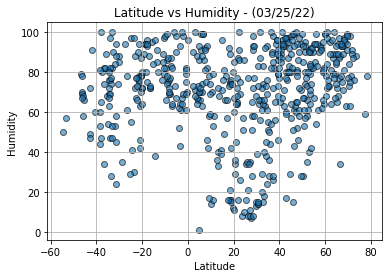

In [34]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Humidity' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Humidity'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Humidity - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Fig2_Lat_v_Hum.png")
print(f"This code plots the 'Humidity (%)' vs the 'Latitude' columns from the dataframe. It shows that as we approach the latitudes of 40 and -40 there's a higher likelihood that humidity will drop.")


## Latitude vs. Cloudiness Plot

This code plots the 'Cloud Coverage' vs the 'Latitude' columns from the dataframe. It shows that there tends to be more cloud coverage in the northern hemisphere.


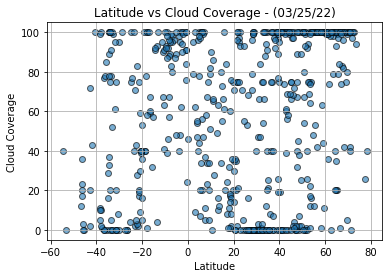

In [35]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Cloud Coverage' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Cloud Coverage'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Cloud Coverage - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.grid()
plt.savefig("Fig3_Lat_v_Cloud.png")

print(f"This code plots the 'Cloud Coverage' vs the 'Latitude' columns from the dataframe. It shows that there tends to be more cloud coverage in the northern hemisphere.")


## Latitude vs. Wind Speed Plot

This code plots the 'Wind Speed' vs the 'Latitude' columns from the dataframe. It shows that wind speeds isn't much affected by latitude.


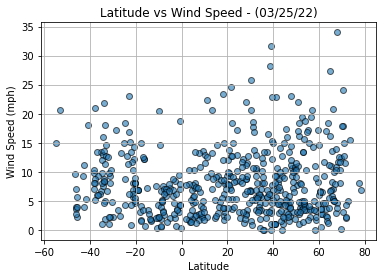

In [36]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Cloud Coverage' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Wind Speed'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Wind Speed - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Fig4_Lat_v_Wind.png")

print(f"This code plots the 'Wind Speed' vs the 'Latitude' columns from the dataframe. It shows that wind speeds isn't much affected by latitude.")

## Linear Regression

In [42]:
# OPTIONAL: Create a function to create Linear Regression plots
# This function will automatically calculate, graph, and print the values desired. It will take inputs for each type of graph. 
def regress_func(x_axis, y_axis, xlabel, ylabel, table_name, fig_name):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    line = slope*x_axis+intercept
    plt.scatter(x_axis, y_axis, alpha=.6, edgecolor='black')
    plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(table_name)
    plt.legend()
    plt.grid()
    plt.savefig(fig_name)
    print(f"The R-squared value is {rvalue*rvalue}")

In [43]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = (clean_city_df.loc[clean_city_df['Latitude'] > 0])
southern_df = (clean_city_df.loc[clean_city_df['Latitude'] <= 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.8210746297048133


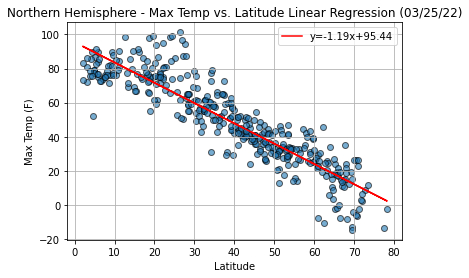

In [44]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Max Temp (F)'].astype(float), "Latitude",
             "Max Temp (F)", f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})", "Fig5_NH_Lat_v_Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.4199564831891141


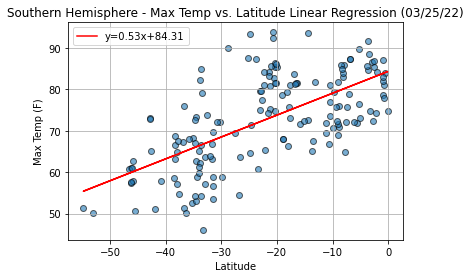

In [45]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Max Temp (F)'].astype(float), "Latitude",
             "Max Temp (F)", f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig6_SH_Lat_v_Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.0991314269767083


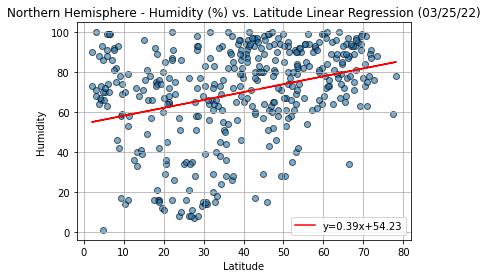

In [46]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig7_NH_Lat_v_Hum")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.06484832438719132


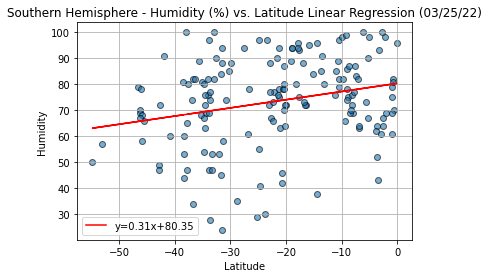

In [47]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig8_SH_Lat_v_Hum")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.06872963011522923


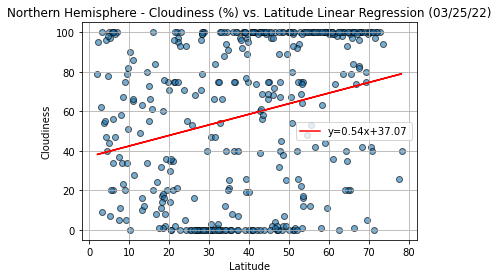

In [48]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Cloud Coverage'].astype(float), "Latitude",
             "Cloudiness", f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig9_NH_Lat_v_Cloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.229478943061297


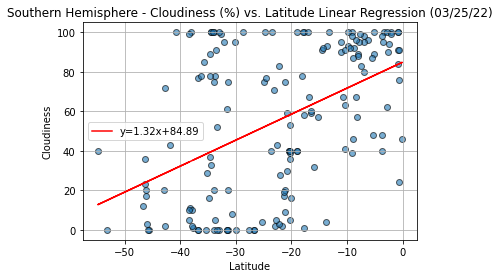

In [49]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Cloud Coverage'].astype(float), "Latitude",
             "Cloudiness", f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig10_SH_Lat_v_Cloud")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.008678081302875014


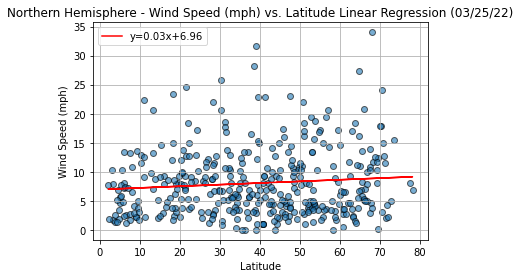

In [50]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig11_NH_Lat_v_Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.08964740516734805


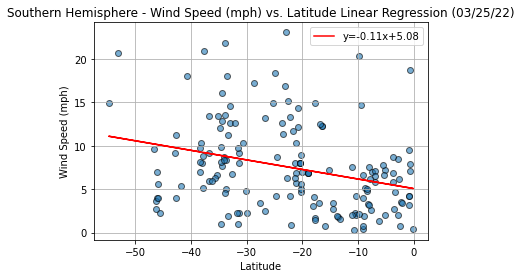

In [51]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig12_SH_Lat_v_Wind")